### Data Source https://archive.ics.uci.edu/ml/datasets/Wine+Quality

In [135]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

red_df = pd.read_csv('winequality-red.csv', sep = ';')
white_df = pd.read_csv('winequality-white.csv' , sep = ';')

In [86]:
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


### Questions
1. What factors make good quality wine?
2. Is high alcolhol makes good wine?
3. Is a certain type white or red receives better ratings?
4. What level of acidity is associated with quality wines?
5. Do sweeter wines receives better ratings?

## Assessing

In [87]:
# number of samples in each dataset
# number of columns in each dataset
red_df.shape, white_df.shape

((1599, 12), (4898, 12))

In [88]:
# features with missing values
red_df.info()
# No missing value in red wine DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [89]:
# features with missing values
white_df.info()
# No missing value in white wine DF

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed acidity           4898 non-null float64
volatile acidity        4898 non-null float64
citric acid             4898 non-null float64
residual sugar          4898 non-null float64
chlorides               4898 non-null float64
free sulfur dioxide     4898 non-null float64
total sulfur dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [90]:
# duplicate rows in the white wine dataset
sum(white_df.duplicated())

937

In [91]:
# number of unique values for quality in each dataset
red_df.quality.nunique(), white_df.quality.nunique()

(6, 7)

In [92]:
# mean density of the red wine dataset
red_df.density.mean()

0.9967466791744833

### Appending Data for red and white wines

In [93]:
# create color column in both DataFrames
import numpy as np
red_arr = np.repeat('red', len(red_df))
white_arr = np.repeat('white', len(white_df))

print("red array is of size {}, and white is of size {}".format(red_arr.size, white_arr.size))
                

red array is of size 1599, and white is of size 4898


In [94]:
# create red series and add it to red wine DataFrame
red_color = pd.Series(red_arr)
red_df['color'] = red_color
red_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [95]:
# create white series and add it to white wine DataFrame
white_color = pd.Series(white_arr)
white_df['color'] = white_color
white_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [96]:
wine_df = red_df.append(white_df, ignore_index=True)

In [97]:
wine_df.shape

(6497, 13)

In [98]:
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [99]:
wine_df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,white
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,white


In [100]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed acidity           6497 non-null float64
volatile acidity        6497 non-null float64
citric acid             6497 non-null float64
residual sugar          6497 non-null float64
chlorides               6497 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
color                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


### Rename Columns


In [101]:
# rename column
#red_df = red_df.rename(columns = {'total_sulfurdioxide':'total_sulfur_dioxide'})

## Exploring with Visuals

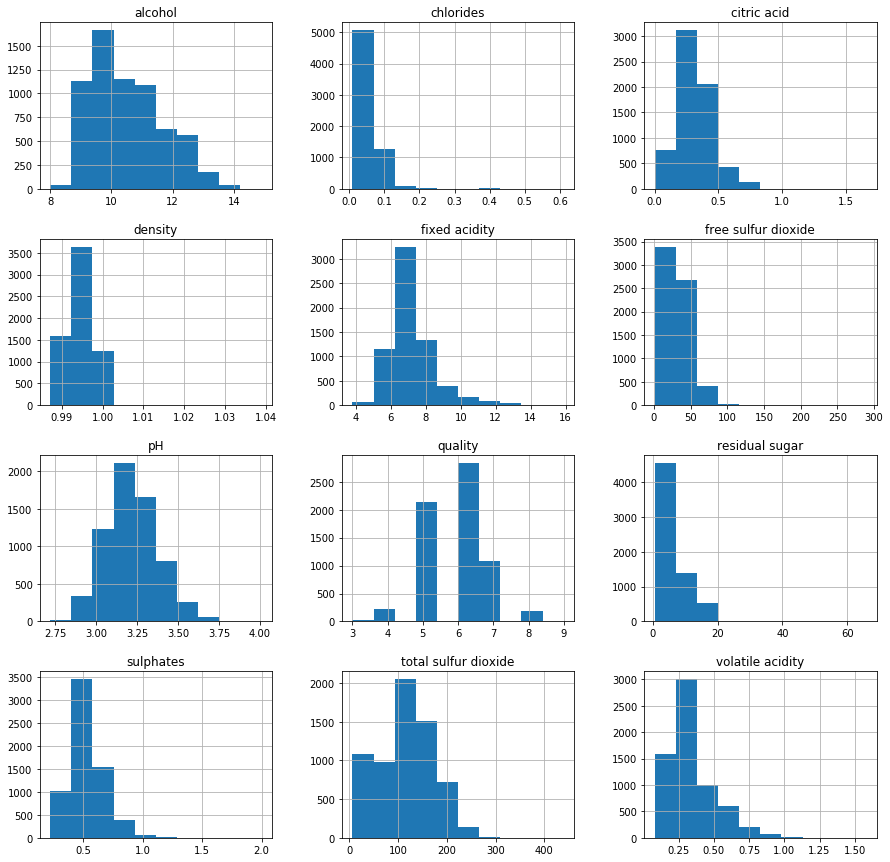

In [102]:
# Q1. Based on histograms of columns in this dataset, which of the following feature variables appear skewed to the right? 
# Fixed Acidity, Total Sulfur Dioxide, pH, Alcohol

wine_df.hist(figsize=(15,15));

#### Observation: Alcohol data is skewed to the right

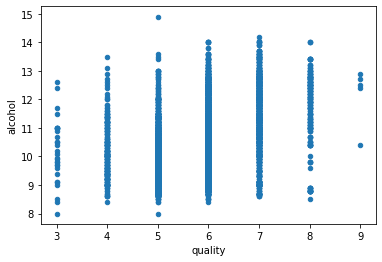

In [103]:
# Q2 Based on scatterplots of quality against different feature variables, which of the following is most likely to have a positive impact on quality? 
# Volatile Acidity, Residual Sugar, pH, Alcohol
wine_df.plot.scatter(x='quality', y='alcohol');

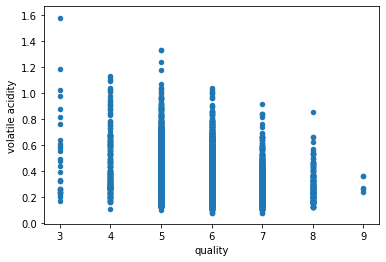

In [104]:
wine_df.plot.scatter(x='quality', y='volatile acidity');

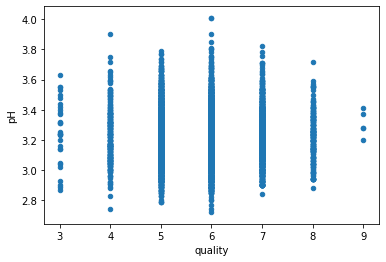

In [105]:
wine_df.plot.scatter(x='quality', y='pH');

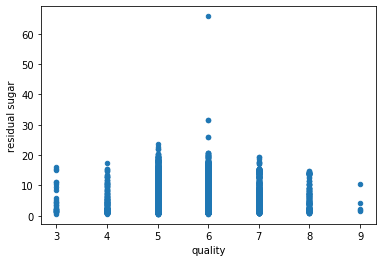

In [106]:
wine_df.plot.scatter(x='quality', y='residual sugar');

## Drawing Conclusions

### Q1: Is a certain type of wine (red or white) associated with higher quality?


In [107]:
wine_df.groupby(['color'], as_index=False)['quality'].mean()

,color,quality
0,red,5.636023
1,white,5.877909


### Q2: What level of acidity (pH value) receives the highest average rating?


In [108]:
# View the min, 25%, 50%, 75%, max pH values with Pandas describe
wine_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


In [109]:
# Bin edges that will be used to "cut" the data into groups
bin_edges = [2.7,3.1,3.2, 3.3,4.0 ] # Fill in this list with five values you just found

In [110]:
# Labels for the four acidity level groups
bin_names = ['low', 'medium', 'moderately high', 'high'] # Name each acidity level category

In [111]:
# Creates acidity_levels column
wine_df['acidity_levels'] = pd.cut(wine_df['pH'], bin_edges, labels=bin_names)

# Checks for successful creation of this column
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,color,acidity_levels
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,high
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,moderately high
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,high


In [112]:
# Find the mean quality of each acidity level with groupby
wine_df.groupby('acidity_levels').mean().quality

acidity_levels
low                5.785850
medium             5.782028
moderately high    5.842105
high               5.860516
Name: quality, dtype: float64

### Q3: Do wines with higher alcoholic content receive better ratings?

In [117]:
# To answer this question, use query to create two groups of wine samples:
# Low alcohol (samples with an alcohol content less than the median)
# High alcohol (samples with an alcohol content greater than or equal to the median)
# Then, find the mean quality rating of each group.
wine_df.alcohol.describe()

count    6497.000000
mean       10.491801
std         1.192712
min         8.000000
25%         9.500000
50%        10.300000
75%        11.300000
max        14.900000
Name: alcohol, dtype: float64

In [118]:
low_alcohol_df = wine_df.query('alcohol < 10.3')

In [122]:
high_alcohol_df = wine_df.query('alcohol >= 10.3')

In [123]:
low_alcohol_df.quality.mean(), high_alcohol_df.quality.mean()

(5.475920679886686, 6.146084337349397)

### Q4: Do sweeter wines (more residual sugar) receive better ratings?

In [124]:
wine_df['residual sugar'].describe()

count    6497.000000
mean        5.443235
std         4.757804
min         0.600000
25%         1.800000
50%         3.000000
75%         8.100000
max        65.800000
Name: residual sugar, dtype: float64

In [128]:
# get median
wine_df['residual sugar'].median()

3.0

In [130]:
low_sugar_df = wine_df[wine_df['residual sugar'] < 3.0]

In [131]:
high_sugar_df = wine_df[wine_df['residual sugar'] >= 3.0]

In [132]:
low_sugar_df.quality.mean(), high_sugar_df.quality.mean()

(5.808800743724822, 5.82782874617737)

## Plot Conclusions

### #1 Do wines with higher alcoholic content receive better ratings?

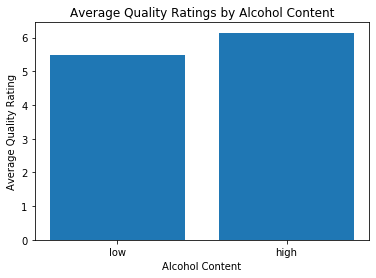

In [142]:
# Bar chart between alcohol and average quality
x = ['low', 'high']
heights = [low_alcohol_df.quality.mean(), high_alcohol_df.quality.mean()]
labels = ['Low', 'High']
plt.bar(x, heights)
plt.title('Average Quality Ratings by Alcohol Content')
plt.xlabel('Alcohol Content')
plt.ylabel('Average Quality Rating');

### #2: Do sweeter wines receive higher ratings?

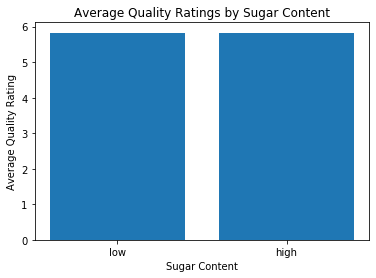

In [143]:
# Bar chart between residual sugar and average quality
x = ['low', 'high']
heights = [low_sugar_df.quality.mean(), high_sugar_df.quality.mean()]
labels = ['Low', 'High']
plt.bar(x, heights)
plt.title('Average Quality Ratings by Sugar Content')
plt.xlabel('Sugar Content')
plt.ylabel('Average Quality Rating');

### #3: What level of acidity receives the highest average rating?

In [146]:
low_acidity = wine_df.query("acidity_levels == 'low'")
medium_acidity = wine_df.query("acidity_levels == 'medium'")
mod_high_acidity = wine_df.query("acidity_levels == 'moderately high'")
high_acidity = wine_df.query("acidity_levels == 'high'")

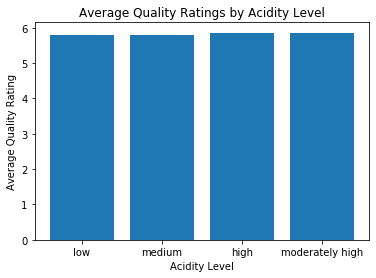

In [150]:
# Bar chart between acidity level and average quality
x = ['low', 'medium', 'high', 'moderately high']
heights = [low_acidity.quality.mean(), medium_acidity.quality.mean(), high_acidity.quality.mean(), mod_high_acidity.quality.mean()]
plt.bar(x, heights)
plt.title('Average Quality Ratings by Acidity Level')
plt.xlabel('Acidity Level')
plt.ylabel('Average Quality Rating');

### Create a line plot for the data in #3

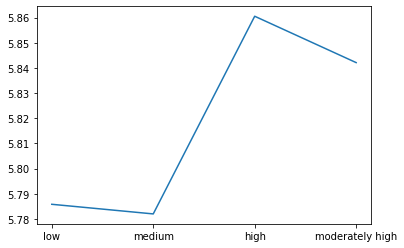

In [151]:
plt.plot(x,heights);